<a href="https://colab.research.google.com/github/niklasgrimm98/Digital-Organization/blob/main/Kopie_von_questions_chapter2_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv")

data.head(10)

Mounted at /content/drive


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?


**Machine Learning Pipeline**: A sequence of data processing components is called a data pipeline. Pipelines are very
common in machine learning systems, since there is a lot of data to manipulate and
many data transformations to apply. 

For our example: Couple of cleaning steps are needed in order to train the model properly. Such as logarithmic transformation.

**Supervised Learning task**

**Regression Task**, since we predict numeric values (house prices)

**Batch Learning**
Is sufficient, since there is no flow of data 

**Performance Measure** (2 typical ones)
Root mean square error 
Mean absolute Error 
Both the RMSE and the MAE are ways to measure the distance between two vectors:
the vector of predictions and the vector of target values.


##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

In [ ]:
#data.describe()
#data.info()
data.value_counts()

date             price      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long    
20140502T000000  235000.0   2         1.00       1210         9400      1.0     0           0     2          6      1210        0              1949      0             98106    47.5342  -122.360    1
20141223T000000  1130000.0  4         3.00       3180         4649      2.0     0           0     4          9      2070        1110           1925      0             98105    47.6583  -122.273    1
20141224T000000  255000.0   3         1.50       1110         10296     1.0     0           0     5          7      1110        0              1964      0             98042    47.4220  -122.153    1
                                      1.00       1580         8206      1.0     0           0     3          7      1100        480            1962      0             98198    47.3676  -122.312    1
          

Feature Date is listed as an object --> not really categorical attribute since it might be unlimited amount of differen dates of sales

Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

In [ ]:
data.hist(bins=50, figsize=(18,12))
data['yr_renovated'].hist()

<Axes: >

Right skewed: eg. Price bedrooms, sqft_living etc

Yr_renovated: If year of renovation is either unknown or House has never been renovated the year of renovation is set to 0 otherwise it is set somewhere around year 2000

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [ ]:
# Some Data Cleaning
data['date'] = pd.to_datetime(data['date'])

#bin the values of the ‘yr_renovated’ column into two intervals: (-1,0] and (0,inf)
data['renovated'] = pd.cut(data['yr_renovated'], bins=[-1, 1, 2999], labels=[0, 1])
data['renovated'].head()

data['yr_renovated'] = data[['yr_built','yr_renovated']].max(axis=1)
data.head(20)

##Create a Test Set

Try to explain what a *stratified sampling* is. Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

**Stratified Sampling**
Divide data into homogeneous subgroups called strata. That is used to guarantee that the test set contains a representative of the overall dataset. 

In [ ]:

data['price_cat']= pd.cut(np.log(data["price"]), bins=6, labels=range(1,7))


#Split Dataset
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2,random_state=42)


#train_set = # YOUR TASK
#test_set = # YOUR TASK

In [ ]:

strat_train_set, strat_test_set = train_test_split(data, test_size=0.2, stratify=data["price_cat"], random_state=42)

strat_test_set["price_cat"].value_counts() / len(strat_test_set)


In [ ]:
data = train_set.copy()
data.head(100)


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? **More towards the North** For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

In [ ]:
data.plot(kind="scatter", x="long", y="lat", c=data["price_cat"],cmap="jet", colorbar=True,  grid=True, figsize=(14,8), alpha=0.5)
plt.show()

### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. How can the values of this correlation effect be interpreted? What are probably the best variables to predict? For which variables does the Pearson coefficient make sense and for which not?

In [ ]:
# YOUR TASK
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

In [ ]:
#YOUR TASK
from pandas.plotting import scatter_matrix

attributes= ['price','sqft_living', 'sqft_above', 'sqft_basement', 'grade', 'bathrooms'] 
scatter_matrix(data[attributes],figsize=(12,8))
plt.show()

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


In [ ]:
#YOUR TASK
data['bedroom_density']= data['bedrooms']/data['sqft_living']
corr_matrix1 = data.corr()
corr_matrix1['price'].sort_values(ascending=False)
### --> Negative Correlation for Bedroom density: If price goes up bedroom density is getting smaller --> myb due to bigger houses ?!

##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [ ]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()
data_label.head()

###Missing Data

What options do we have to deal with missing values? Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

In [ ]:
#YOUR TASK: Write a code that give all lines, which have any missing value. 
null_data = data[data.isnull().any(axis=1)]
null_data

### Answer: Options to clean empty data
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the missing values to some value (zero, the mean, the median, etc.). This is
called imputation.


### Answer: SimpleImputer
Replace missing values with the median value

###Handling Text and Categorical Attributes


What are ordinal and categorical data?

**Ordinal data represents ordered categorical data (e.g. "slow", "medium", "fast")**

Do we have such data in our data set?
 **Waterfron is categorical; price_cat or grade is ordinal** 
 
What possibilities do we have to transform this data correctly? 
**OneHotEncoder to convert categorical values into one hot-vectors --> only one attribute will be equal to 1. Therefore ML won't assume that two nearby categorical attributes are more similar to each other than distant attributes**\
What are dummy attributes?\
**The output attributes of the OneHotEncoder are called dummy attributes, since they are only another way of representing the categorical attributes**

Try to understand what the function *OneHotEncoder()* does with the variable waterfront.\
transforms categorical attributes to numerical values and stores the information in an array (One-hot numeric array - each element is either 0 or 1) 

  --> e.g. categorical column with "slow, medium, fast". The array might look like (0,0,1). This way we present categorical data as numeric and are able to use it for ML?**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

waterfront_encoded = cat_encoder.fit_transform(data)
data.info()

##Feature Scaling and Transformation

What is min-max scaling and standardization of features? What is a heavy tail in a distribution? What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

#### Answer MinMax Scaling
Min-max scaling (many people call this normalization) is the simplest: for each
attribute, the values are shifted and rescaled so that they end up ranging from
0 to 1.

####Answer Standardization
Standardization is different: first it subtracts the mean value (so standardized values
have a zero mean), then it divides the result by the standard deviation (so standard‐
ized values have a standard deviation equal to 1). Unlike min-max scaling, standardi‐
zation does not restrict values to a specific range

####Answer What is a heavy tail in a distribution
when values far from the mean are not exponentially rare. Heavily right skewed Data

#### Problem with both 
Min-max scaling and standardization will squash
most values into a small range. 

In [ ]:
data.columns

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess! Try to understand the following two code blocks, how are the variables *long* and *lat* converted?


**Code Explanation**
10 Clusters are formed with the KMeans Clustering algorithm. Clusters are generated, based on the price tag. The cluster similarity is higher the closer a house is towards its respective closest cluster center(centroid)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


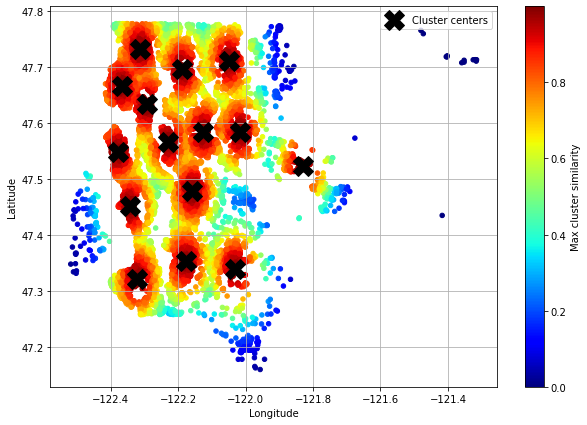

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made? What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?

####Answer 
- Log Pipeline --> "sqft_living", "sqft_lot", "sqft_above" are logarithmic transformed as well as standardized

- Geo --> ["lat", "long"] are clustered into 15 clusters

- cat Pipeline --> ["waterfront", "renovated"] oneHotEncoder

- ..

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

#Create the clusters, in this case on Lat and Long 
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

#Standardises numerical columns
default_num_pipeline = make_pipeline(StandardScaler())

#applies logarithmic transformations with np.log and then standardises it afterwards
log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

#Applys logartmic transformation to the price columns
label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

#Transform categorical attributes into numerical ones 
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

#Application of the abovementioned pipelines for the respective attributes
preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

How many features do we have for predicition?

31 Features


In [ ]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


(17290, 31)

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

####Answer
Transofrmation pipeline preprocesses the data and afterwards we apply the linear Regression model. 

In [ ]:
from sklearn.linear_model import LinearRegression

#Datalabel contains attribute "price"
data_label_transformed = preprocessing_label.fit_transform(data_label)
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

print("data_label_Transformed", data_label_transformed)
data_predictions = lin_reg.predict(data)
print("Test",data_predictions)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


data_label_Transformed [[12.69158046]
 [12.45683136]
 [12.33929149]
 ...
 [13.26212532]
 [12.40901349]
 [12.66032792]]
Test [[12.77422697]
 [12.623683  ]
 [12.22679277]
 ...
 [12.98453844]
 [11.59625407]
 [12.82388948]]


/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

In [ ]:
#TEST
data_predictions
#data.info()

#data_label.describe()

array([[12.77422697],
       [12.623683  ],
       [12.22679277],
       ...,
       [12.98453844],
       [11.59625407],
       [12.82388948]])

In [ ]:
data_label_transformed

array([[12.69158046],
       [12.45683136],
       [12.33929149],
       ...,
       [13.26212532],
       [12.40901349],
       [12.66032792]])

In [ ]:
# Your task
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print("Median Prediction", np.median(np.exp(data_predictions)))
print("Median Actual", np.median(np.exp(data_label_transformed)))
print("Median Absolute Error" , median_absolute_error(np.exp(data_label_transformed), np.exp(data_predictions)))
print("Mean Squared Error", mean_squared_error(np.exp(data_label_transformed), np.exp(data_predictions), squared=False))
print("R Squared", r2_score(np.exp(data_label_transformed), np.exp(data_predictions)))


Median Prediction 456803.49875922647
Median Actual 450000.00000000035
Median Absolute Error 50351.342354758584
Mean Squared Error 144777.34862056334
R Squared 0.839565992538339


####Evaluation
- Median: Predicted and actual are very similar to each other. 

- Median Absolute Error of ~50351. Which means on avg our prediction are off by ~50k$. 

- The mean Square Error is even higher. But difficult to interpret it uses different units than our dataset. 

- Therefore R Squared gives us ~0.84 which is relatively high, which means our model actually isn't too bad.

###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation? Why have I adjusted the R squared error with a separate function? What is the function *np.ravel* doing?

##### Cross Validation
- Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. 

##### adjusted R Squared ??
- The adjusted R-squared value increases when a new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. The adjusted R-squared value is more appropriate when evaluating model fit and in comparing alternative models in the feature selection stage of model building12
- The **negative value** is used because the cross_val_score function in the previous code expects a scoring function that maximizes the score. Since we want to minimize the mean squared error, we return the negative of the adjusted 
R-squared value, which will be minimized by the cross_val_score function.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
#np.ravel to flatten the array e.g. [0,1,2][3,4,5] --> [0,1,2,3,4,5]
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

#Cross Validation splits data into X folds
forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, t

The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

In [ ]:
pd.Series(np.exp(forest_rmses)).describe()
#Linear Regression
#pd.Series(lin_rmse).describe()

count    10.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do. What are the advantages of each method. For which parameters would this make sense in our example?

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [ ]:
# Your TASK
xtest = test_set.drop("price", axis=1)
ytest = test_set["price"].copy()

test_label_transformed = preprocessing_label.fit_transform(data_label)
Ran_Forest_prediction = forest_reg.predict(xtest)
Ran_Forest_prediction=Ran_Forest_prediction.reshape((-1,1))

#Test
print("Median Prediction", np.median(np.exp(Ran_Forest_prediction)))
print("Median Absolute Error" , median_absolute_error(np.exp(test_label_transformed), np.exp(Ran_Forest_prediction)))
print("Mean Squared Error", mean_squared_error(np.exp(test_label_transformed), np.exp(Ran_Forest_prediction), squared=False))

print("R Squared", r2_score(np.exp(test_label_transformed), np.exp(Ran_Forest_prediction)))



/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Median Prediction 451386.8799762005


ValueError: ignored

**Why does this error occur?**

##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

Why is it possible that we need a monitoring code?

Try to save our learned model so that we can reload it at any time.

In [ ]:
import joblib

joblib.dump(forest_reg, "RandomForestModel_PricePrediction_on_Houses")

##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 